## Análise exploratória dados fitbit

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib as plt

In [2]:
# facilitando acesso às pastas para ambas pessoas analisando os dados
caminho_arquivo = Path('dailyActivity_merged.csv').resolve().parents[1]
print('caminho do diretório',caminho_arquivo)

caminho do diretório D:\python\bellabeat-analysis


In [3]:
d_activity = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/dailyActivity_merged.csv')
heartrate = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/heartrate_seconds_merged.csv')
h_calories = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/hourlyCalories_merged.csv')
h_intensity = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/hourlyIntensities_merged.csv')
m_calories = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/minuteCaloriesNarrow_merged.csv')
m_intensity = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/minuteIntensitiesNarrow_merged.csv')
m_sleep = pd.read_csv(f'{caminho_arquivo}//database/fitbit-data/minuteSleep_merged.csv')
weightlog = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/weightLogInfo_merged_treated.csv')

### Análise de uso das features

####  Gráfico de uso por feature

In [4]:
id_d_activity = d_activity['Id'].nunique()
id_h_calories = h_calories['Id'].nunique()
id_h_intensity = h_intensity['Id'].nunique()
id_m_calories = m_calories['Id'].nunique()
id_m_intensity = m_intensity['Id'].nunique()
id_m_sleep = m_sleep['Id'].nunique()
id_heartrate = heartrate['Id'].nunique()
id_weightlog = weightlog['Id'].nunique()

In [5]:
ids = pd.Series({'d_activity': id_d_activity, 'calories': id_h_calories, 'exercise_ intensity': id_h_intensity , 'sleep':id_m_sleep ,  'heartrate': id_heartrate, 'weightlog': id_weightlog })

<Axes: >

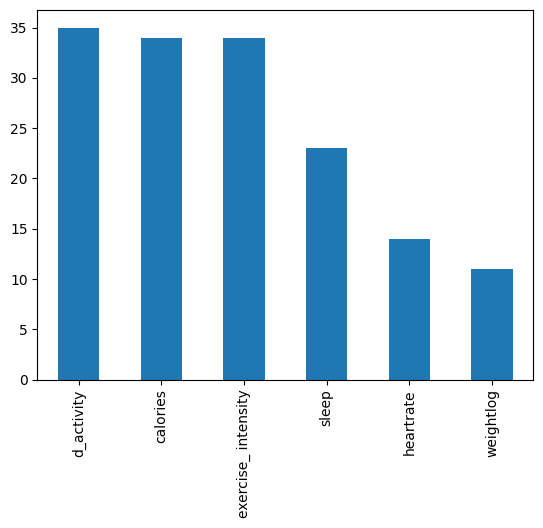

In [6]:
ids.plot.bar()

### análise de tipo de exercício (tempo)

In [7]:
fairly_active_minutes_per_id = d_activity.groupby('Id')['FairlyActiveMinutes'].aggregate('sum')
very_active_minutes_per_id = d_activity.groupby('Id')['VeryActiveMinutes'].aggregate('sum')
lightly_active_minutes_per_id = d_activity.groupby('Id')['LightlyActiveMinutes'].aggregate('sum')

fairly_active_minutes_sum = fairly_active_minutes_per_id.sum()
very_active_minutes_sum = very_active_minutes_per_id.sum()
lightly_active_minutes_sum = lightly_active_minutes_per_id.sum()



In [8]:
active_minutes_sum = pd.Series({'Lightly Active time': lightly_active_minutes_sum,'Fairly Active time': fairly_active_minutes_sum, 'Very Active time': very_active_minutes_sum })

<Axes: >

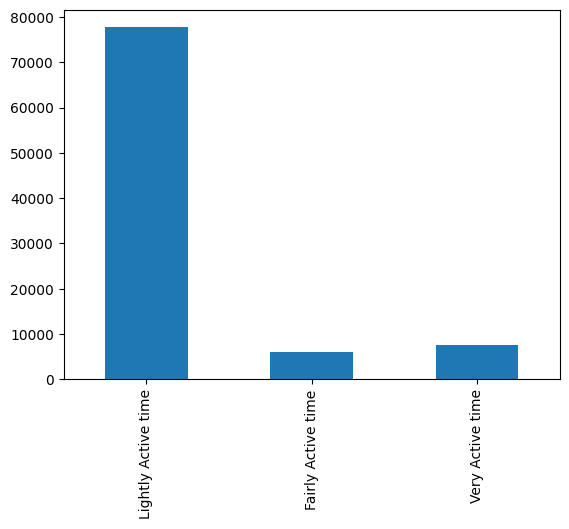

In [9]:
active_minutes_sum.plot.bar()

### Análise de tipo de exercício (distância)

In [10]:
fairly_active_distance_per_id = d_activity.groupby('Id')['ModeratelyActiveDistance'].aggregate('sum')
very_active_distance_per_id = d_activity.groupby('Id')['VeryActiveDistance'].aggregate('sum')
lightly_active_distance_per_id = d_activity.groupby('Id')['LightActiveDistance'].aggregate('sum')

fairly_active_distance_sum = fairly_active_distance_per_id.sum()
very_active_distance_sum = very_active_distance_per_id.sum()
lightly_active_distance_sum = lightly_active_distance_per_id.sum()

In [11]:
active_distance_sum = pd.Series({'Lightly Active distance': lightly_active_distance_sum,'Fairly Active distance': fairly_active_distance_sum, 'Very Active distance': very_active_distance_sum })

<Axes: >

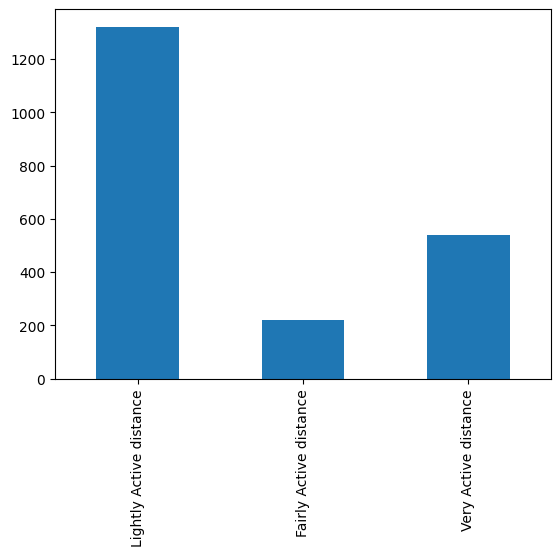

In [12]:
active_distance_sum.plot.bar()

### Checagem de timeframe dos dados e presença dos ids ao longo do tempo

In [13]:
pd.pivot_table(d_activity, index='ActivityDate', values= 'Id', aggfunc='count').sort_values(by='ActivityDate', ascending= True)
# primeiras duas semanas dos dados só tem 2 usuários ativos, outros usuários se tornam ativos ao longo dos dias restantes
# 15 usos do fitbit por id deve levar em conta essa distribuição
# primeiro dia do dataframe: 12 de março . último dia do data frame: 12 de abril


,Id
ActivityDate,
3/12/2016,2
3/13/2016,2
3/14/2016,2
3/15/2016,2
3/16/2016,2
3/17/2016,2
3/18/2016,2
3/19/2016,2
3/20/2016,2


### Dias com e sem uso de fitbit (assumindo que dias sem total steps são dias em que a pessoa não usou o fitbit, nõa que ela não se mexeu)

In [14]:

null_days = d_activity.loc[d_activity['TotalSteps']==0, 'ActivityDate'].value_counts().sum() #61
active_days= d_activity.loc[d_activity['TotalSteps']> 0, 'ActivityDate'].value_counts().sum() #396

active_null_distr = pd.DataFrame([null_days, active_days])

array([<Axes: ylabel='0'>], dtype=object)

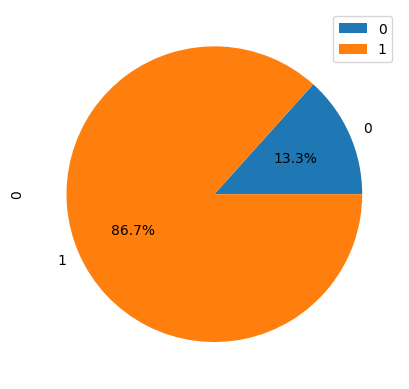

In [15]:
active_null_distr.plot(kind='pie', autopct='%1.1f%%', subplots=True)


In [ ]:
overweight_ids = weightlog.loc[weightlog['BMI_describe'] == 'Overweight', 'Id'].unique()
overweight_ids #não inclui obese

array([2891001357, 4558609924, 4702921684, 8253242879, 8877689391])

In [18]:
weightlog['BMI_describe'].value_counts()

BMI_describe
Normal weight    18
Overweight       13
Obesity           2
Name: count, dtype: int64